In [1]:
import os
import sys
import time
import shutil
import logging
import argparse
import yaml
import traceback

import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
pwd

'/atlas/u/madeline/multi-fairgen/notebooks'

In [4]:
cd ../

/atlas/u/madeline/multi-fairgen


# Ratios

In [8]:
data = np.load('src/classification/results/cifar_ddim_z/val_ratios.npz')
ratios = data['ratios'].squeeze()
y = data['d_labels']

In [9]:
y.shape

(8098,)

In [10]:
ratios.shape

(8098,)

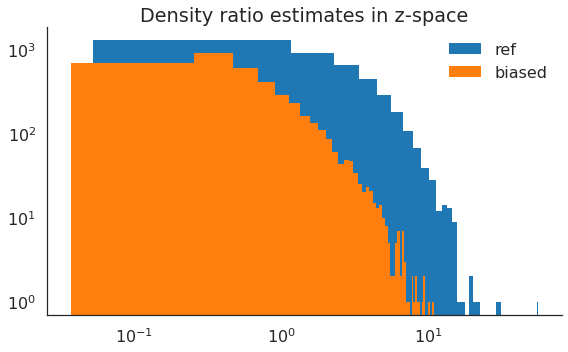

In [11]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(ratios[y==0]), bins=50, label='biased')
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

In [12]:
new_ratios = ratios/(0.4 * ratios + 0.6)

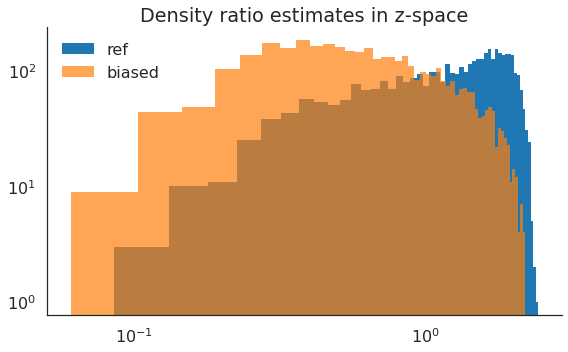

In [16]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(new_ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(new_ratios[y==0]), bins=50, label='biased', alpha=0.7)
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

# ResNet

In [130]:
data = np.load('src/classification/results/cifar_ddim_z_resnet/val_ratios.npz')
ratios = data['ratios'].squeeze()
y = data['d_labels']

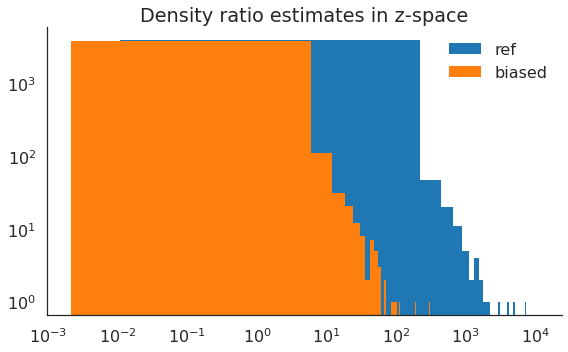

In [131]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(ratios[y==0]), bins=50, label='biased')
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

In [132]:
new_ratios = ratios/(0.4 * ratios + 0.6)

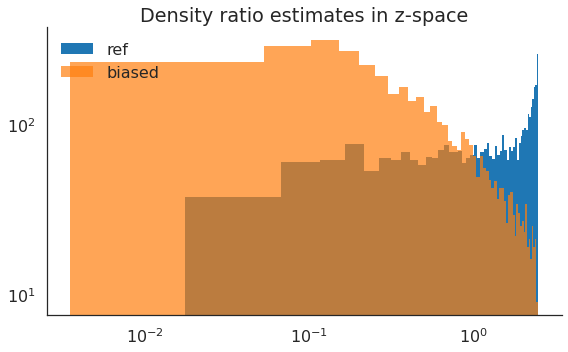

In [133]:
# new_ratios = (new_ratios ** 3)
plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1], bins=50, label='ref')
_ = plt.hist(new_ratios[y==0], bins=50, label='biased', alpha=0.7)
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

In [134]:
new_ratios.max()

2.4996583

In [135]:
new_ratios.min()

0.0034940108

# X-Space?

In [37]:
data = np.load('src/classification/results/cifar_ddim_x/val_ratios.npz')
ratios = data['ratios'].squeeze()
y = data['d_labels']

In [38]:
idx = ratios!=np.inf

In [39]:
ratios = ratios[idx]
y = y[idx]

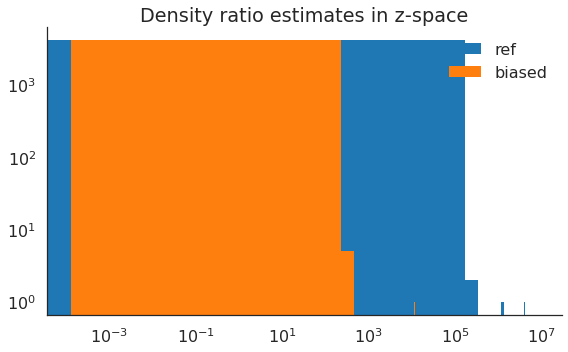

In [40]:
plt.figure(figsize=(8,5))

_ = plt.hist(sorted(ratios[y==1]), bins=50, label='ref')
_ = plt.hist(sorted(ratios[y==0]), bins=50, label='biased')
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

In [41]:
new_ratios = ratios/(0.4 * ratios + 0.6)

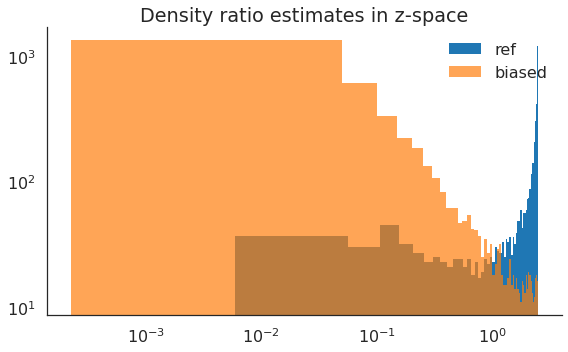

In [42]:
plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1], bins=50, label='ref')
_ = plt.hist(new_ratios[y==0], bins=50, label='biased', alpha=0.7)
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

In [43]:
new_ratios.max()

2.4999998

In [44]:
new_ratios.min()

0.00022270592

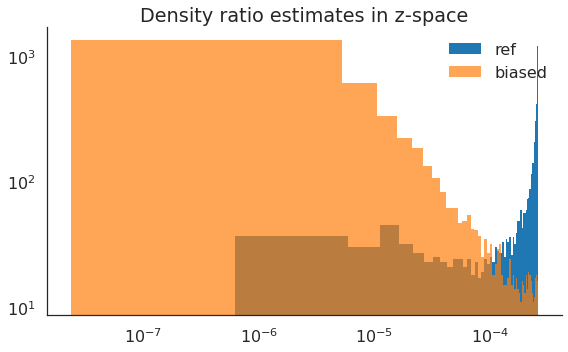

In [32]:
plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1]/new_ratios.sum(), bins=50, label='ref')
_ = plt.hist(new_ratios[y==0]/new_ratios.sum(), bins=50, label='biased', alpha=0.7)
plt.xscale('log')
plt.yscale('log')

plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

----

# OLD

In [13]:
samples = np.load('src/classification/results/cifar_ddim_baseline/samples.npz')['x']

In [12]:
np.savez('src/classification/results/cifar_ddim_baseline/samples.npz', **{'x': samples})

In [ ]:
print(np.mean(all_zs[all_dys==0]))
print(np.std(all_zs[all_dys==0]))

In [128]:
print(np.mean(all_zs[all_dys==1]))
print(np.std(all_zs[all_dys==1]))

0.0063938405
1.0230145


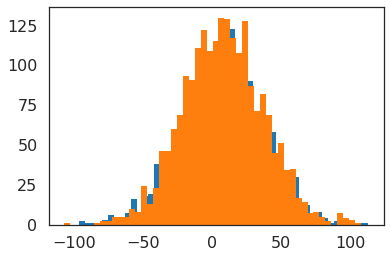

In [18]:
_ = plt.hist(all_zs[all_dys==0].sum(-1), bins=50)
_ = plt.hist(all_zs[all_dys==1].sum(-1), bins=50)

In [19]:
percs = [0.1, 0.25, 0.5, 1.0]
prefix = 'mnist_subset_z_'
data = {}

for perc in percs:
    data[perc] = np.loa

AttributeError: module 'numpy' has no attribute 'loa'

# Subset perc=0.1

In [7]:
data = np.load('src/classification/results/classify_same_bkgd_encodings1.0_mlp/val_ratios.npz')
ratios = data['ratios']
new_ratios = data['ratios']
y = data['d_labels']

In [8]:
sum(y == 0)

4809

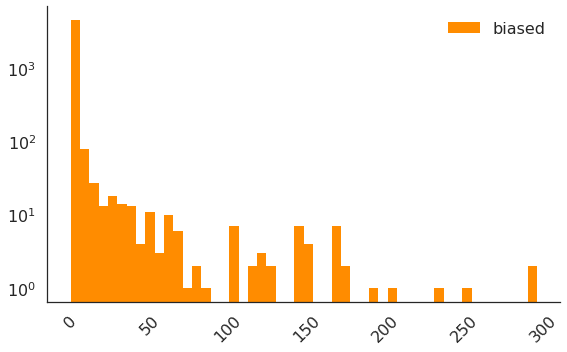

In [9]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==0], bins=50, log=True ,label='biased', color='darkorange')
# _ = plt.hist(new_ratios[y==1], bins=50, log=True, label='ref', alpha=0.5)
plt.xticks(rotation=45)

plt.legend()
sns.despine()
plt.tight_layout()

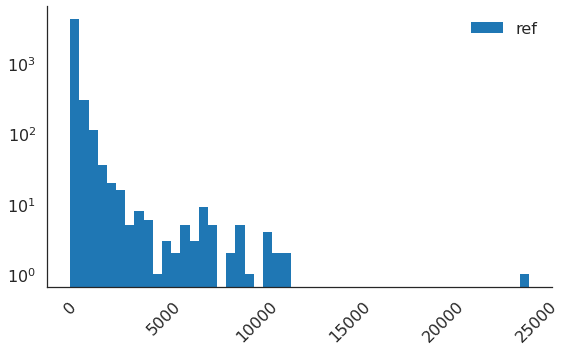

In [10]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==1], bins=50, log=True, label='ref')
plt.xticks(rotation=45)

plt.legend()
sns.despine()
plt.tight_layout()

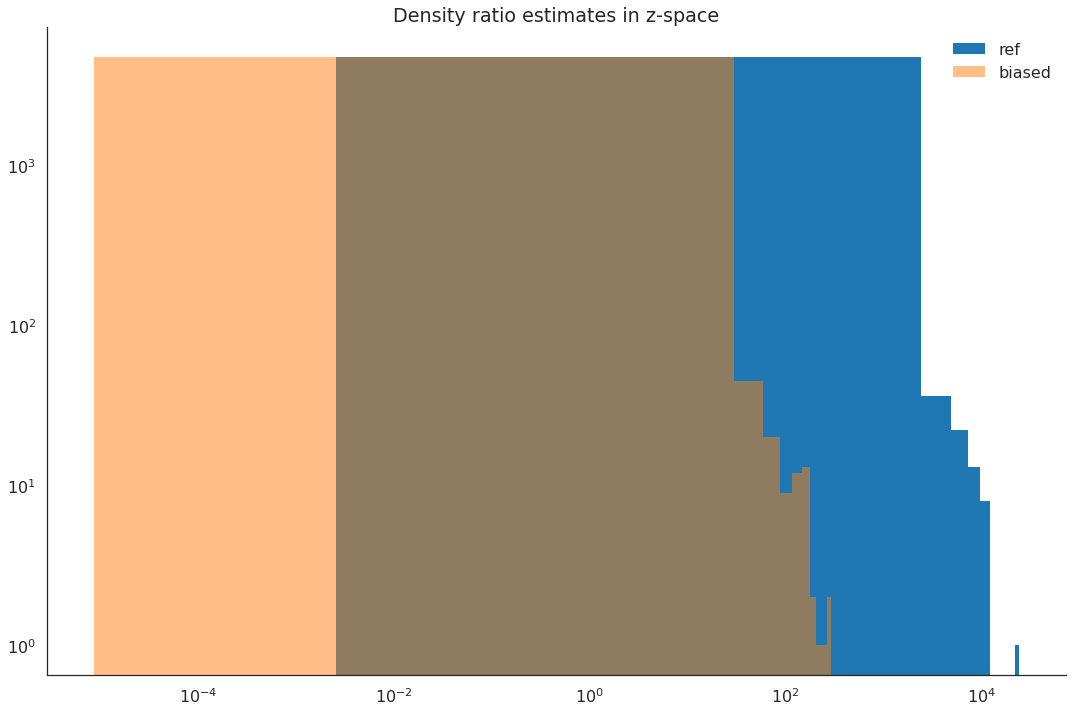

In [11]:
plt.figure(figsize=(15,10))
plt.xscale('log')
plt.yscale('log')
_ = plt.hist(new_ratios[y==1], bins=10, label='ref')
_ = plt.hist(new_ratios[y==0], bins=10, label='biased', alpha=0.5)


plt.title('Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

In [41]:
new_ratios[y==0].mean()

16.414936

In [42]:
new_ratios[y==1].mean()

2390182.5

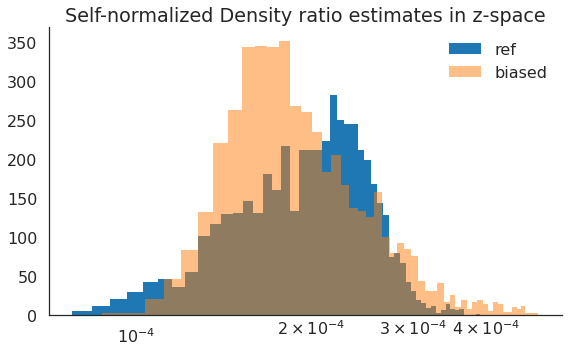

In [12]:
plt.figure(figsize=(8,5))

ratios1 = new_ratios[y==1]**0.1
ratios0 = new_ratios[y==0]**0.1
_ = plt.hist(sorted(ratios1)/ratios1.sum(), bins=50, label='ref')
_ = plt.hist(sorted(ratios0)/ratios0.sum(), bins=50, label='biased', alpha=0.5)
plt.xscale('log')
# plt.yscale('log')

plt.title('Self-normalized Density ratio estimates in z-space')
plt.legend()
sns.despine()
plt.tight_layout()

In [13]:
a = 0.1

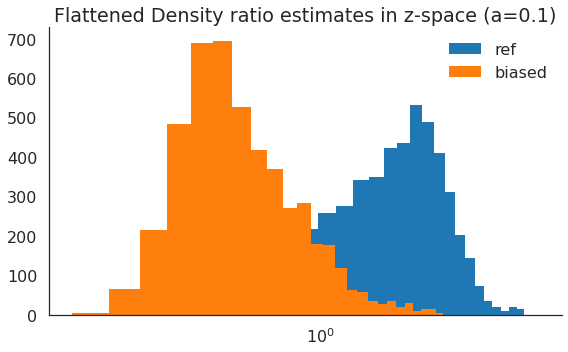

In [14]:
a = 0.1
plt.figure(figsize=(8,5))

_ = plt.hist(new_ratios[y==1]**a , bins=25, label='ref')
_ = plt.hist(new_ratios[y==0]**a , bins=25, label='biased')
plt.xscale('log')
# plt.yscale('log')

plt.title('Flattened Density ratio estimates in z-space (a=0.1)')
plt.legend()
sns.despine()
plt.tight_layout()

In [52]:
len(new_ratios[y==1]**0.1)

11478

In [28]:
print(np.min(new_ratios[y==0]**a), np.max(new_ratios[y==0]**a))

0.0010304108 3.2490072


In [29]:
print(np.min(new_ratios[y==1]**a), np.max(new_ratios[y==1]**a))

0.2824866 4.9245777


In [30]:
nr0 = (new_ratios[y==0]**0.01)
nr1 = (new_ratios[y==1]**0.01)

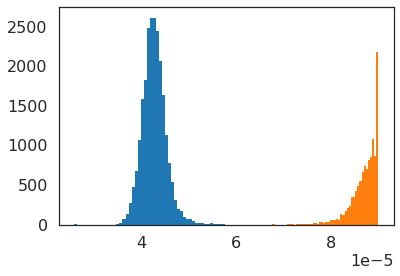

In [31]:
_ = plt.hist(nr0/nr0.sum(), bins=50)
_ = plt.hist(nr1/nr1.sum(), bins=50)

----

# Ratios for equal sized sets

In [99]:
np.min(all_zs)

-20.324703

In [100]:
np.max(all_zs)

25.417936

In [108]:
scaled_zs = all_zs/np.max(all_zs)

In [106]:
scaled_zs = (all_zs - np.min(all_zs))/(np.max(all_zs) - np.min(all_zs))

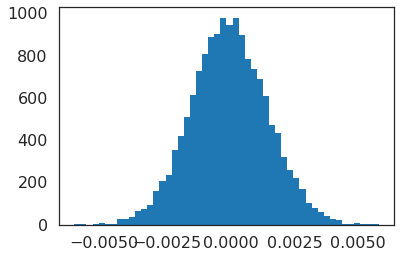

In [109]:
_ = plt.hist(scaled_zs.mean(-1), bins=50)

(array([  1.,   1.,   0.,   1.,   6.,   4.,   4.,  26.,  28.,  35.,  62.,
         74.,  93., 158., 204., 236., 354., 418., 510., 612., 728., 809.,
        886., 901., 980., 945., 980., 899., 786., 738., 688., 608., 472.,
        435., 320., 258., 220., 170., 101.,  79.,  61.,  43.,  27.,  20.,
          3.,   5.,   6.,   3.,   1.,   1.]),
 array([-0.15624191, -0.1501711 , -0.14410031, -0.1380295 , -0.1319587 ,
        -0.1258879 , -0.11981709, -0.11374629, -0.10767549, -0.10160469,
        -0.09553389, -0.08946308, -0.08339228, -0.07732148, -0.07125068,
        -0.06517987, -0.05910907, -0.05303827, -0.04696746, -0.04089666,
        -0.03482586, -0.02875506, -0.02268425, -0.01661345, -0.01054265,
        -0.00447185,  0.00159896,  0.00766976,  0.01374056,  0.01981136,
         0.02588217,  0.03195297,  0.03802377,  0.04409457,  0.05016538,
         0.05623618,  0.06230698,  0.06837779,  0.07444859,  0.08051939,
         0.08659019,  0.09266099,  0.09873179,  0.1048026 ,  0.1108734 ,
 

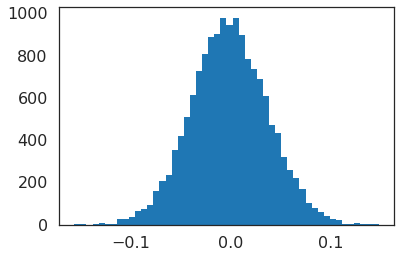

In [95]:
plt.hist(all_zs.mean(-1), bins=50)

In [110]:
data = np.load('classifier/mnist_perc1_results/ratios.npz')
ratios = data['ratios']
new_ratios = data['ratios'][ratios != np.inf]
y = data['d_labels'][ratios != np.inf]

In [111]:
len(y)

19590

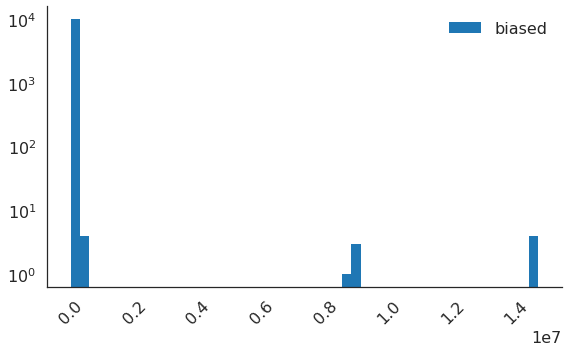

In [59]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==0], bins=50, label='biased', log=True)
# _ = plt.hist(new_ratios[y==1], bins=50, log=True, label='ref', alpha=0.5)
# plt.xticks(np.arange(0, len(new_ratios[y==0])+1, 5))
plt.xticks(rotation=45)

plt.legend()
sns.despine()
plt.tight_layout()

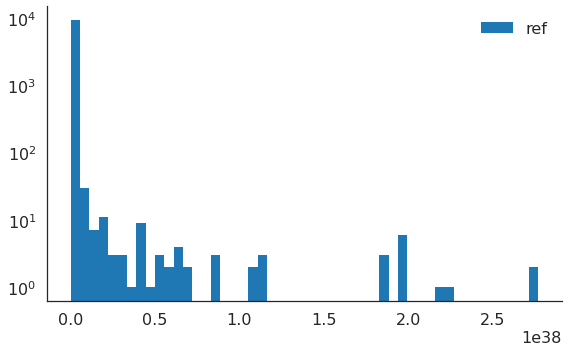

In [60]:
plt.figure(figsize=(8,5))
# _ = plt.hist(new_ratios[y==0], bins=50, log=True ,label='biased')
_ = plt.hist(new_ratios[y==1], bins=50, label='ref', log=True)

plt.legend()
sns.despine()
plt.tight_layout()

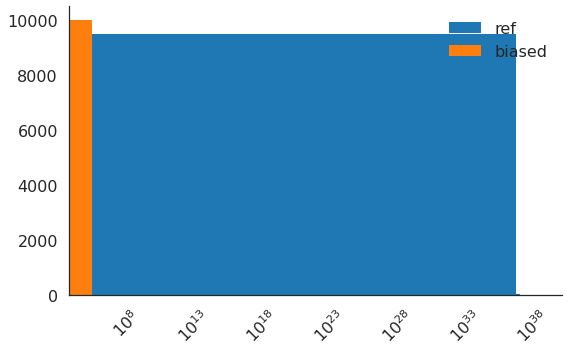

In [61]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==1], bins=50, label='ref')
_ = plt.hist(new_ratios[y==0], bins=50, label='biased')
# plt.xticks(np.arange(0, len(new_ratios[y==0])+1, 5))
plt.xticks(rotation=45)
plt.xscale('log')

plt.legend()
sns.despine()
plt.tight_layout()

----

# Ratios for x-space

In [5]:
data = np.load('classifier/mnist_x_results/ratios.npz')
ratios = data['ratios']
new_ratios = data['ratios'][ratios != np.inf]
y = data['d_labels'][ratios != np.inf]

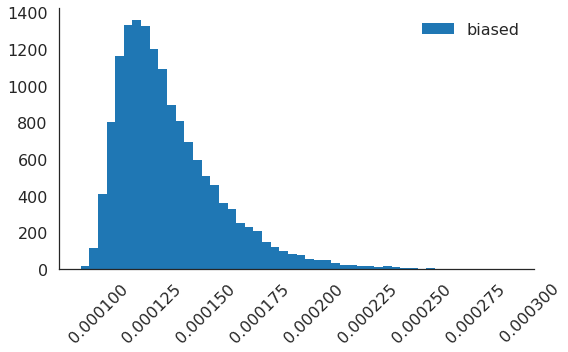

In [8]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==0], bins=50, label='biased')
# _ = plt.hist(new_ratios[y==1], bins=50, log=True, label='ref', alpha=0.5)
# plt.xticks(np.arange(0, len(new_ratios[y==0])+1, 5))
plt.xticks(rotation=45)

plt.legend()
sns.despine()
plt.tight_layout()

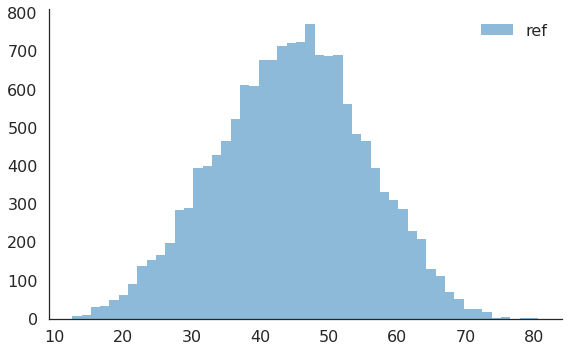

In [40]:
plt.figure(figsize=(8,5))
# _ = plt.hist(new_ratios[y==0], bins=50, log=True ,label='biased')
_ = plt.hist(new_ratios[y==1], bins=50, label='ref', alpha=0.5)

plt.legend()
sns.despine()
plt.tight_layout()

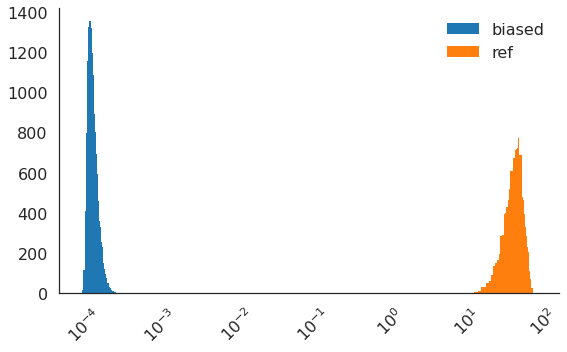

In [11]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==0], bins=50, label='biased')
_ = plt.hist(new_ratios[y==1], bins=50, label='ref')
# plt.xticks(np.arange(0, len(new_ratios[y==0])+1, 5))
plt.xticks(rotation=45)
plt.xscale('log')

plt.legend()
sns.despine()
plt.tight_layout()

# What is up with the encodings?

In [5]:
import os
data_dir = '/atlas/u/madeline/'

In [6]:
split = 'test'
variant = 'biased'
perc = 1.0

record = np.load(os.path.join(data_dir, f'maf_{split}_{variant}_z_perc{perc}.npz'))
zs = record['z']
ys = record['y']
d_ys = record['d_y']

FileNotFoundError: [Errno 2] No such file or directory: 'data/maf_test_mnist_z.npz'

In [13]:
split = 'test'
variant = 'ref'

record = np.load(os.path.join(data_dir, f'maf_{split}_{variant}_z_perc{perc}.npz'))
czs = record['z']
cys = record['y']
cd_ys = record['d_y']

In [14]:
all_zs = np.vstack([zs,czs])

In [15]:
all_zs.shape

(4075, 784)

In [78]:
from sklearn.manifold import TSNE

smaller_mnist = TSNE(n_components=2).fit_transform(all_zs)

In [17]:
all_dys = np.hstack([d_ys, cd_ys])
all_dys.shape

(4075,)

In [53]:
all_dys.sum()

5000

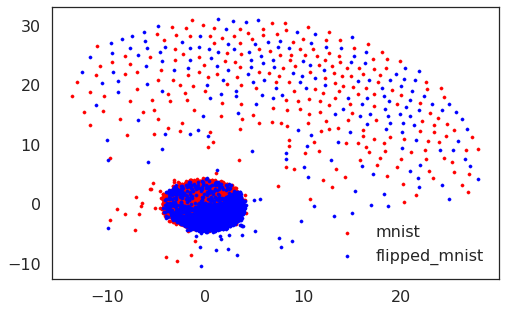

In [80]:
# smaller mnist
plt.figure(figsize=(8,5))
plt.scatter(smaller_mnist[:,0][all_dys==0], smaller_mnist[:,1][all_dys==0], c='red', s=10, label='mnist')
plt.scatter(smaller_mnist[:,0][all_dys==1], smaller_mnist[:,1][all_dys==1], c='blue', s=10, label='flipped_mnist')
plt.legend()

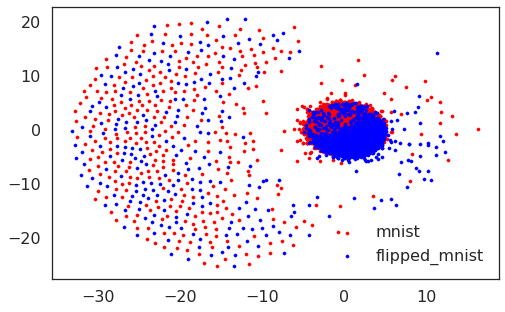

In [56]:
# full sized mnist
plt.figure(figsize=(8,5))
plt.scatter(mnist[:,0][all_dys==0], mnist[:,1][all_dys==0], c='red', s=10, label='mnist')
plt.scatter(mnist[:,0][all_dys==1], mnist[:,1][all_dys==1], c='blue', s=10, label='flipped_mnist')
plt.legend()